In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_percent_list=["./combination"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_percent_list]
df = pd.concat(df,axis=1)
df.columns = index
df = df.rename_axis(["Function", "Times"],axis=0)
print(df)

path_percent_list=["/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment10/Baldwin"+"/combination"+str(i)+".csv" for i in index]
df_baldwin = [read_csv(name) for name in path_percent_list]
df_baldwin = pd.concat(df_baldwin,axis=1)
df_baldwin.columns = index
df_baldwin = df_baldwin.rename_axis(["Function", "Times"],axis=0)
print(df_baldwin)

df_together = pd.concat([df,df_baldwin],axis=0,keys=["Lamarck","Baldwin"])


path_percent_list=["./similarity"+str(i)+".csv" for i in index]
df_similarity = [read_csv(name) for name in path_percent_list]
df_similarity = pd.concat(df_similarity,axis=1)
df_similarity.columns = index
df_similarity = df_similarity.rename_axis(["Function", "Times"],axis=0)
print(df_similarity)

path_percent_list=["./budget"+str(i)+".csv" for i in index]
df_budget = [read_csv(name) for name in path_percent_list]
df_budget = pd.concat(df_budget,axis=1)
df_budget.columns = index
df_budget = df_budget.rename_axis(["Function", "Times"],axis=0)
print(df_budget)

                        590        593        579        588        589  \
Function Times                                                            
F1       Times1    0.496340   0.441634   0.498842   0.490256   0.470203   
         Times2    0.492312   0.495183   0.497568   0.490584   0.480355   
         Times3    0.495637   0.474899   0.471217   0.476186   0.484068   
         Times4    0.499985   0.497061   0.494971   0.499870   0.486204   
         Times5    0.484396   0.474193   0.461035   0.494331   0.497765   
...                     ...        ...        ...        ...        ...   
F23      Times6  -10.536280 -10.536261 -10.536251 -10.536338 -10.536293   
         Times7  -10.536375 -10.536362 -10.536335 -10.536277 -10.536295   
         Times8  -10.536288 -10.536312 -10.536312 -10.536276 -10.536290   
         Times9  -10.536288  -5.128481 -10.536363 -10.536327 -10.536390   
         Times10 -10.536259 -10.536260 -10.536277 -10.536272 -10.536276   

                        

,Times,Function,Combinations,similarity_L
0,Times1,F1,590,1.108797
1,Times1,F1,593,48.746677
2,Times1,F1,579,22.492981
3,Times1,F1,588,13.509763
4,Times1,F1,589,20.063768
...,...,...,...,...
4595,Times10,F23,562,0.365632
4596,Times10,F23,575,0.266094
4597,Times10,F23,573,0.202646
4598,Times10,F23,552,0.066516


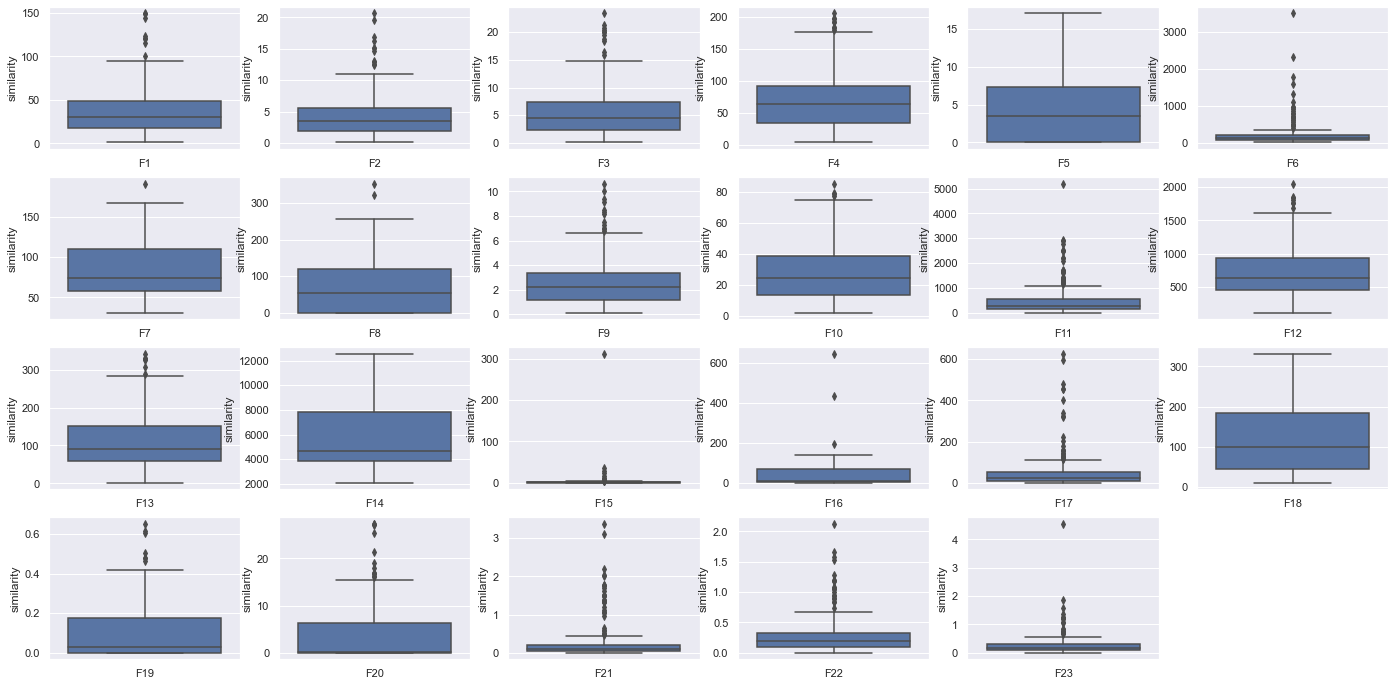

In [94]:
import seaborn as sns
dataframe1 = df_similarity
dataframe1 = dataframe1.stack()
dataframe1 = dataframe1.rename_axis(index=["Function","Times", "Combinations"])
dataframe1 = dataframe1.reset_index(level=[0, 2], name="similarity_L")
dataframe1 = dataframe1.reset_index(drop=False)
display(dataframe1)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
def show_graph(dataframe1):
    sns.set()
    dist_cols = 6
    dist_rows = 4
    plt.figure(figsize=(4 * dist_cols, 3 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe1[dataframe1["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        sns.boxplot(data=dataf, y="similarity_L", x="Function")
        plt.xlabel(" ")
        plt.ylabel("similarity")
        i = i + 1
    plt.savefig("./similarity_{0}.png".format("lamarck"), dpi=600)
    plt.show()
show_graph(dataframe1=dataframe1)

,Times,Function,Combinations,budget_L
0,Times1,F1,590,225772.0
1,Times1,F1,593,283012.0
2,Times1,F1,579,138209.0
3,Times1,F1,588,247093.0
4,Times1,F1,589,257737.0
...,...,...,...,...
4595,Times10,F23,562,85948.0
4596,Times10,F23,575,349088.0
4597,Times10,F23,573,266231.0
4598,Times10,F23,552,606580.0


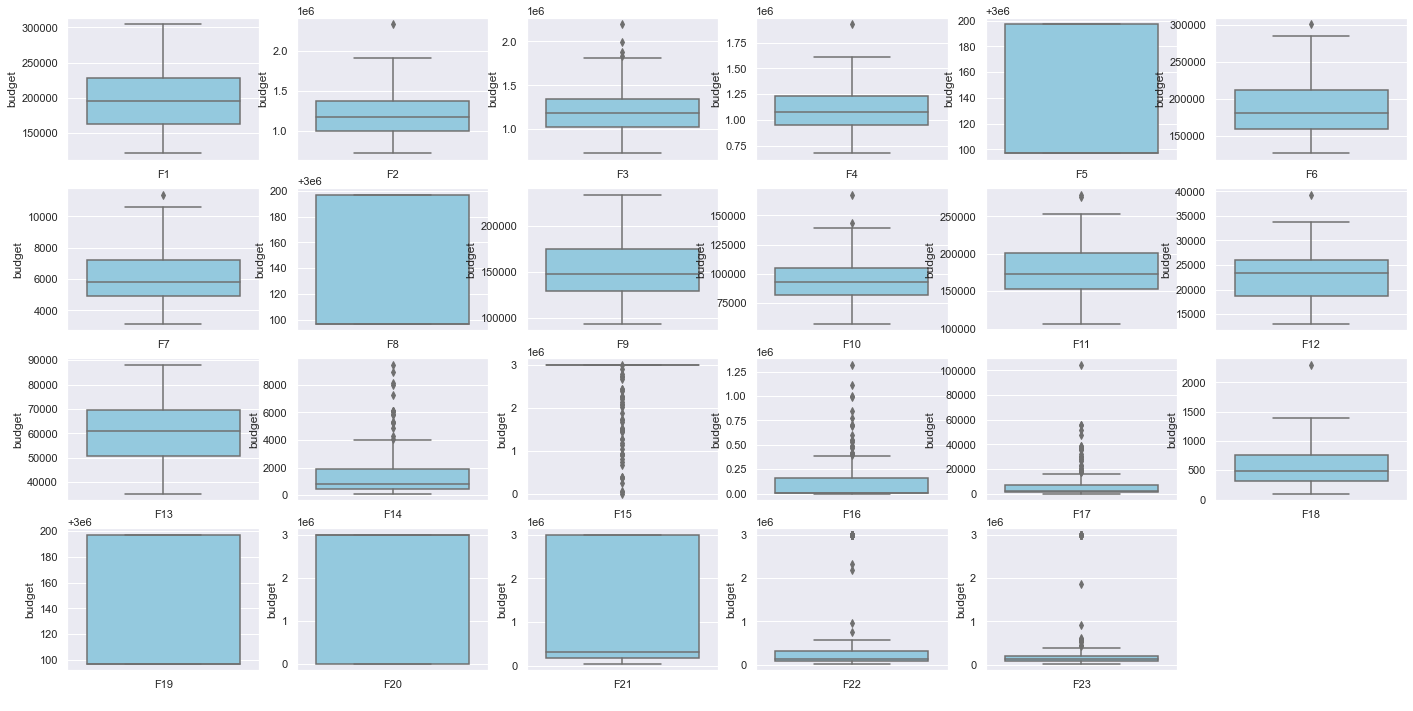

In [95]:
dataframe2 = df_budget
dataframe2 = dataframe2.stack()
dataframe2 = dataframe2.rename_axis(index=["Function","Times", "Combinations"])
dataframe2 = dataframe2.reset_index(level=[0, 2], name="budget_L")
dataframe2 = dataframe2.reset_index(drop=False)
display(dataframe2)
def show_graph(dataframe2):
    sns.set()
    dist_cols = 6
    dist_rows = 4
    plt.figure(figsize=(4 * dist_cols, 3 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe2[dataframe2["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        sns.boxplot(data=dataf, y="budget_L", x="Function",color='skyblue')
        plt.xlabel(" ")
        plt.ylabel("budget")
        i = i + 1
    plt.savefig("./budget_{0}.png".format("lamarck"), dpi=600)
    plt.show()
show_graph(dataframe2=dataframe2)

,Times,Function,Combinations,rawdata_L
0,Times1,F1,590,0.496340
1,Times1,F1,593,0.441634
2,Times1,F1,579,0.498842
3,Times1,F1,588,0.490256
4,Times1,F1,589,0.470203
...,...,...,...,...
4595,Times10,F23,562,-10.536367
4596,Times10,F23,575,-10.536388
4597,Times10,F23,573,-10.536349
4598,Times10,F23,552,-10.536277


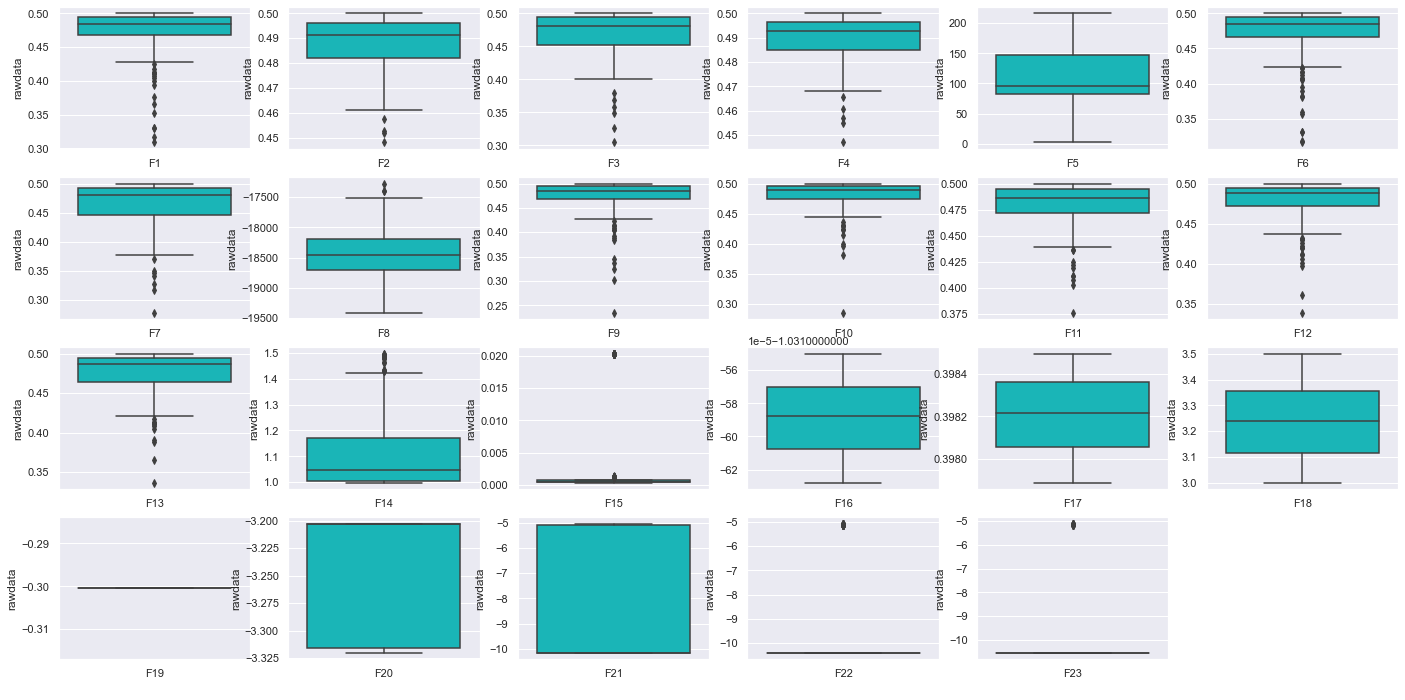

In [96]:
dataframe3 = df
dataframe3 = dataframe3.stack()
dataframe3 = dataframe3.rename_axis(index=["Function","Times", "Combinations"])
dataframe3 = dataframe3.reset_index(level=[0, 2], name="rawdata_L")
dataframe3 = dataframe3.reset_index(drop=False)
display(dataframe3)
def show_graph(dataframe3):
    sns.set()
    dist_cols = 6
    dist_rows = 4
    plt.figure(figsize=(4 * dist_cols, 3 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe3[dataframe3["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        sns.boxplot(data=dataf, y="rawdata_L", x="Function",color="darkturquoise")
        plt.xlabel(" ")
        plt.ylabel("rawdata")
        i = i + 1
    plt.savefig("./rawdata_{0}.png".format("lamarck"), dpi=600)
    plt.show()
show_graph(dataframe3=dataframe3)

         Function  Times       
Lamarck  F1        Times1   590     0.496340
                            593     0.441634
                            579     0.498842
                            588     0.490256
                            589     0.470203
                                     ...    
Baldwin  F23       Times10  562    -5.175647
                            575   -10.536269
                            573   -10.536258
                            552   -10.536265
                            555   -10.536279
Length: 9200, dtype: float64

,Function,Combinations,Mode,Times,rawdata
0,F1,590,Lamarck,Times1,0.496340
1,F1,593,Lamarck,Times1,0.441634
2,F1,579,Lamarck,Times1,0.498842
3,F1,588,Lamarck,Times1,0.490256
4,F1,589,Lamarck,Times1,0.470203
...,...,...,...,...,...
9195,F23,562,Baldwin,Times10,-5.175647
9196,F23,575,Baldwin,Times10,-10.536269
9197,F23,573,Baldwin,Times10,-10.536258
9198,F23,552,Baldwin,Times10,-10.536265


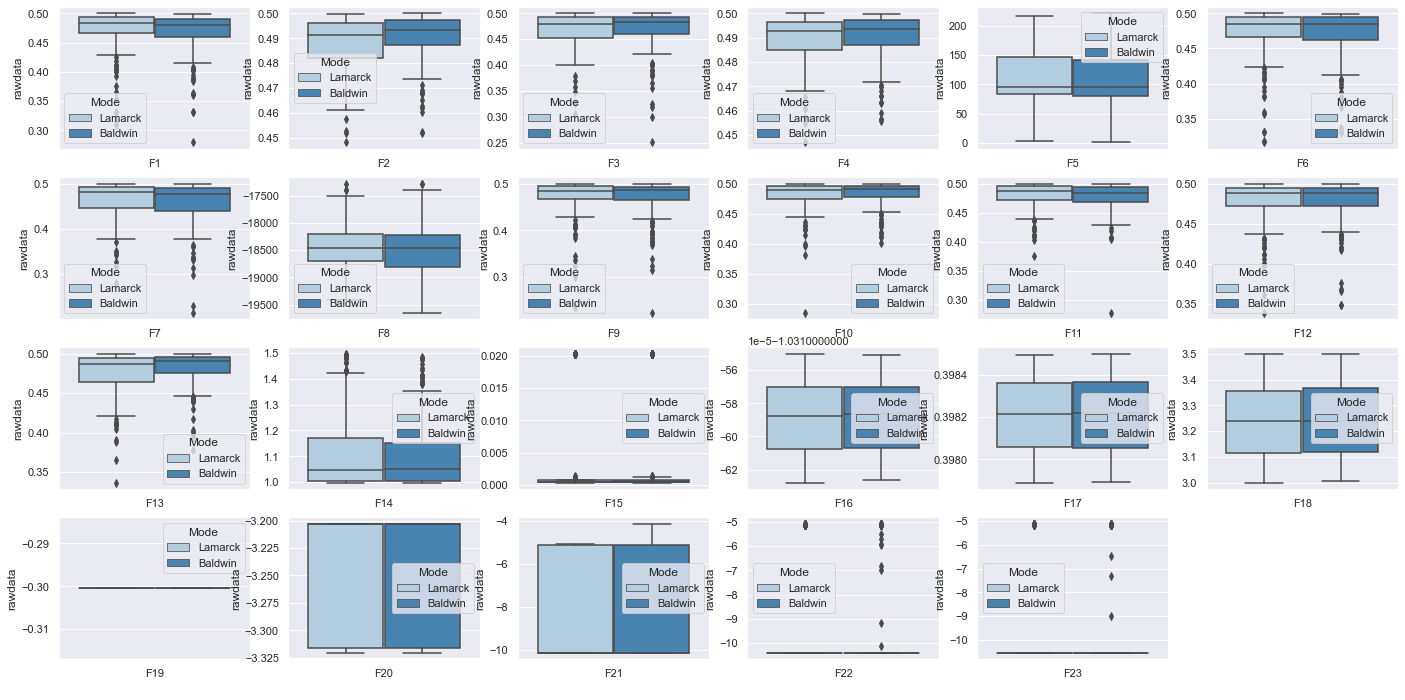

In [97]:
import seaborn as sns
dataframe4 = df_together
dataframe4 = dataframe4.stack()
display(dataframe4)
dataframe4 = dataframe4.rename_axis(index=["Mode","Function","Times","Combinations"])
dataframe4 = dataframe4.reset_index(level=[0, 2], name="rawdata")
dataframe4 = dataframe4.reset_index(drop=False)
display(dataframe4)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
def show_graph(dataframe4):
    sns.set()
    dist_cols = 6
    dist_rows = 4
    plt.figure(figsize=(4 * dist_cols, 3 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe4[dataframe4["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        sns.boxplot(data=dataf, y="rawdata", x="Function",hue="Mode",palette="Blues")
        plt.xlabel(" ")
        plt.ylabel("rawdata")
        i = i + 1
    plt.savefig("./together_rawdata_{0}.png".format("lamarck"), dpi=600)
    plt.show()
show_graph(dataframe4=dataframe4)

In [98]:
# dataframe3["similarity_L"] = dataframe1["similarity_L"]
# dataframe3["budget_L"] = dataframe2["budget_L"]
# print(dataframe3)